In [1]:
import os
executable_path = "/home/alberto/.sdkman/candidates/java/current/bin"
if executable_path not in os.environ["PATH"]:
    os.environ["PATH"] = f"{executable_path}:{os.environ['PATH']}"


In [2]:
from moonlight import *
import numpy as np
import matplotlib.pyplot as plt

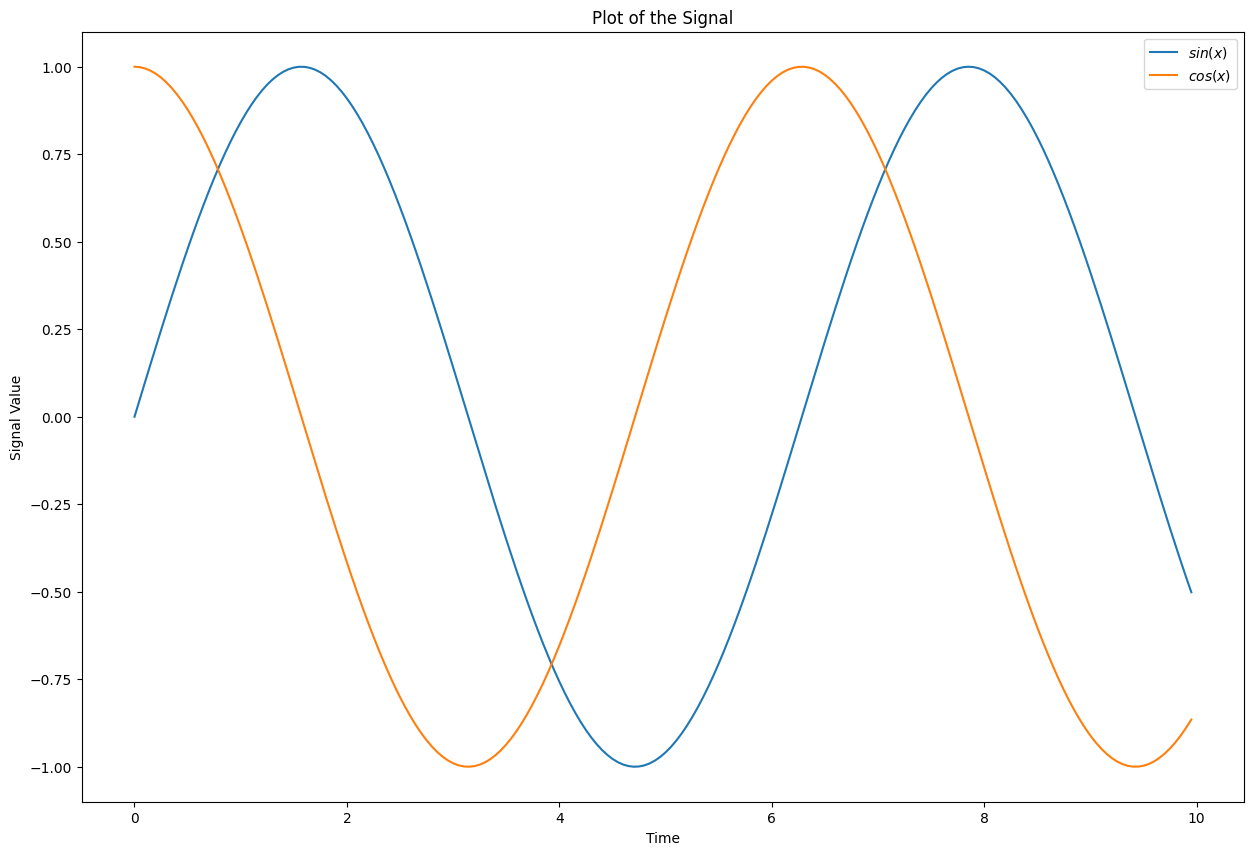

In [3]:
## STEP 1: generate the  signal
time =list(np.arange(0,10,0.05))
f1,f2 = np.sin(time),np.cos(time)

plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1, label = '$sin(x)$')
plt.plot(time,f2, label = '$cos(x)$')
plt.title("Plot of the Signal")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()

The signal is defined with two different variables which are real numbers.
The domain can be boolean in case we have to evaluate the boolean semantics, otherwise we can use minmax in case we want to evaluate the quantitative semantics.


In [4]:
## STEP 2: describe and load the monitor

script = """
signal { real x; real y;}
domain boolean; 
formula future = globally [0, 1]  (x > y);
formula past = historically [0, 1]  (x > y);
"""

moonlightScript = ScriptLoader.loadFromText(script)

In [5]:
## STEP 3 (optional): change the domain on the fly
#moonlightScript.setMinMaxDomain();
#moonlightScript.setBooleanDomain();

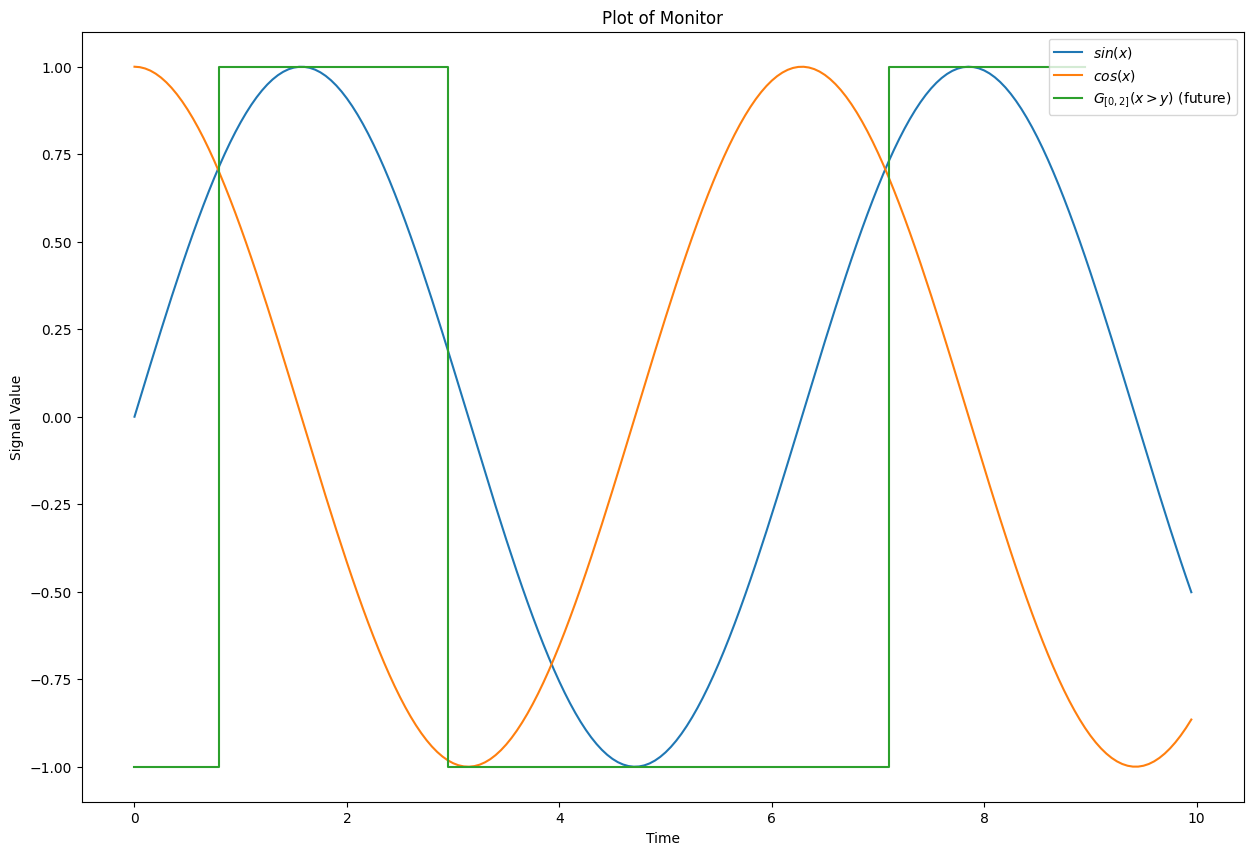

In [6]:
## STEP 4: getting the monitor associated with a target formula
futureMonitor = moonlightScript.getMonitor("future")

## STEP 5: monitor the signal 
signals = list(zip(f1,f2))
result = np.array(futureMonitor.monitor(time,signals))

plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1, label = '$sin(x)$')
plt.plot(time,f2, label = '$cos(x)$')
plt.step(result[:,0],result[:,1], where='post', label="$G_{[0,2]}(x>y)$ (future)")
plt.title("Plot of Monitor")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()


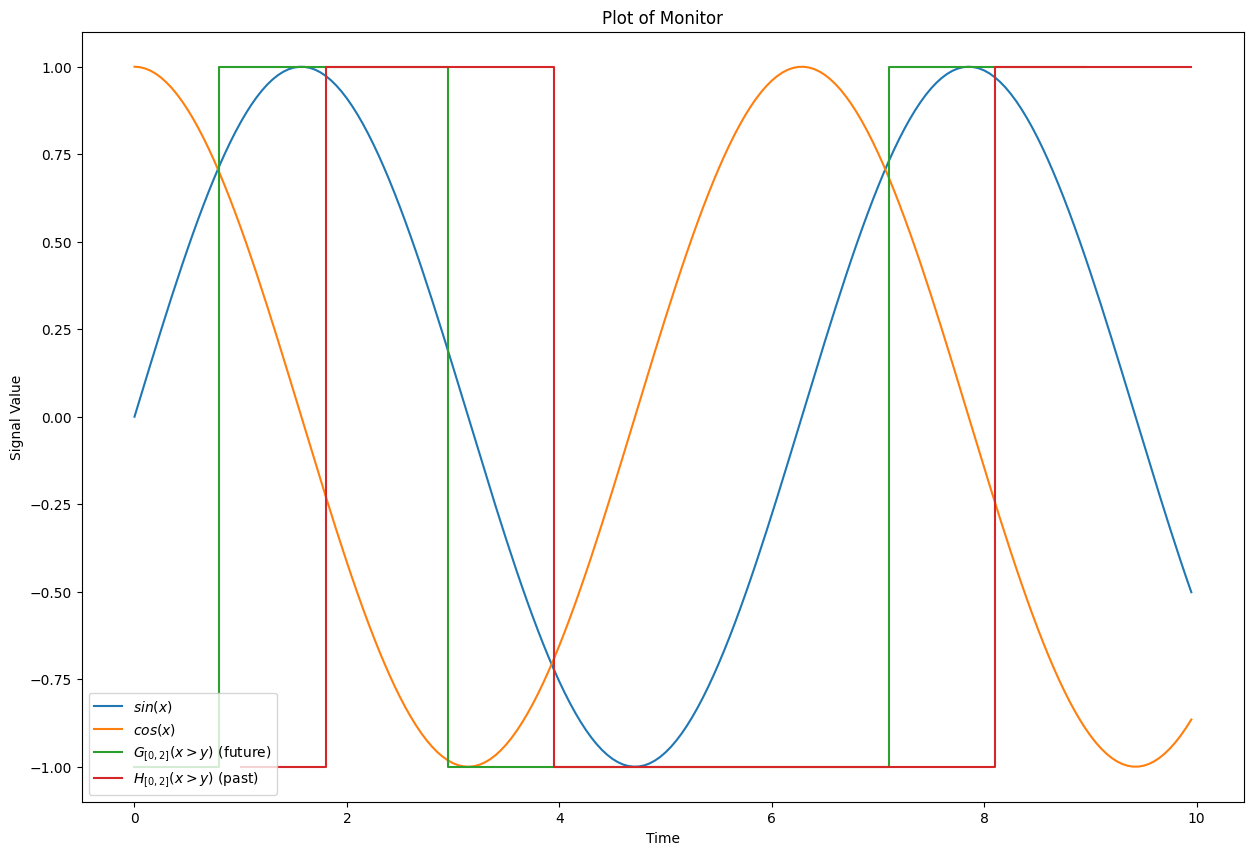

In [7]:
futureMonitor = moonlightScript.getMonitor("future")
pastMonitor = moonlightScript.getMonitor("past")
signals = list(zip(f1,f2))
result_future = np.array(futureMonitor.monitor(time,signals))
result_past = np.array(pastMonitor.monitor(time,signals))


plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1, label = '$sin(x)$')
plt.plot(time,f2, label = '$cos(x)$')
plt.step(result_future[:,0],result_future[:,1], where='post', label="$G_{[0,2]}(x>y)$ (future)")
plt.step(result_past[:,0],result_past[:,1], where='post', label="$H_{[0,2]}(x>y)$ (past)")
plt.title("Plot of Monitor")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()


In [8]:
script = """
signal { real x; }
domain boolean; 
formula future = globally [0, 0.2]  (x > 1);
"""
moonlightScript = ScriptLoader.loadFromText(script)

In [9]:
monitor = moonlightScript.getMonitor("future")
time =list(np.arange(0,10,0.05))
f1=np.sin(time)
space = [[x] for x in f1]
result =monitor.monitor(time,space)

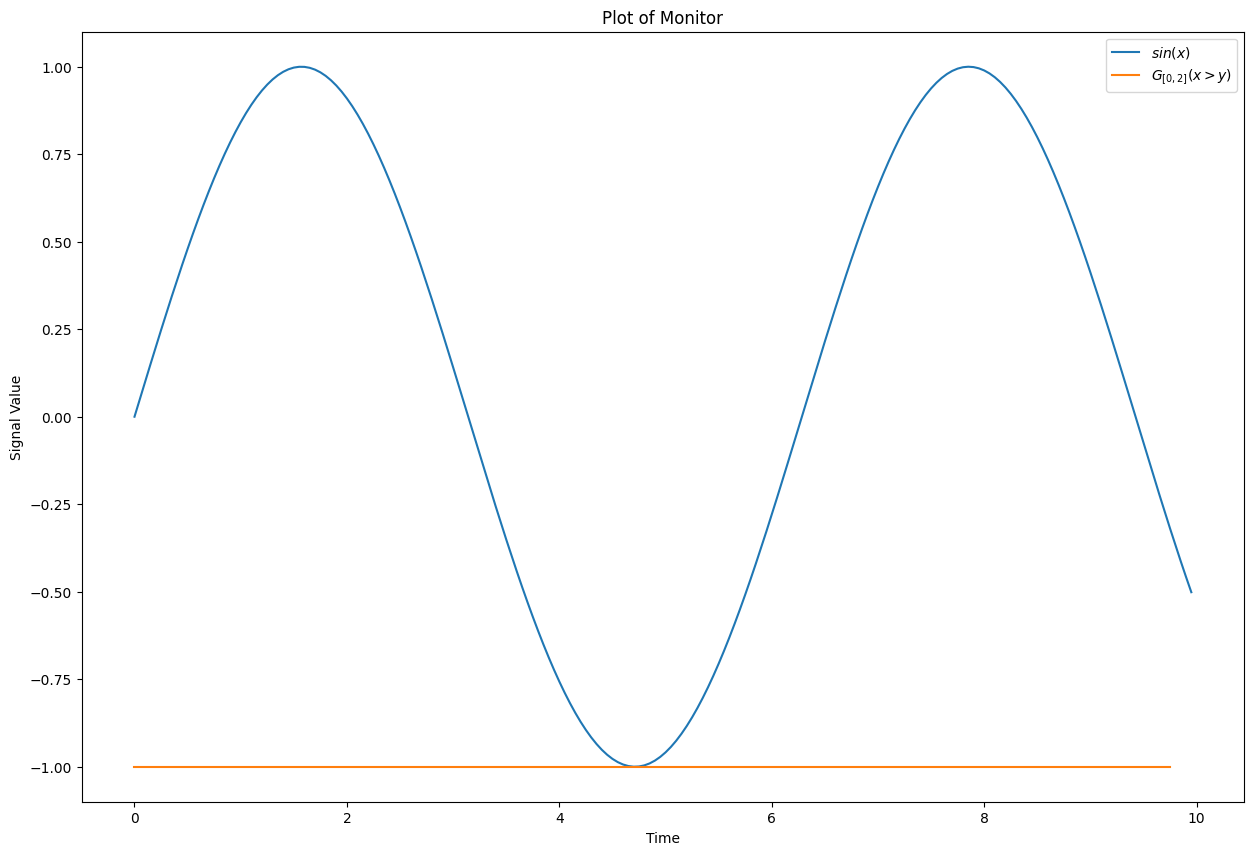

In [11]:

result = np.array(result)


plt.rcParams["figure.figsize"] = (15,10)
plt.plot(time,f1, label = '$sin(x)$')
plt.step(result[:,0],result[:,1], where='post', label="$G_{[0,2]}(x>y)$")
plt.title("Plot of Monitor")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.legend()


In [11]:
print(result)
# [[time, value of the monitoring in that time], ]

# [[0.00, -1], [9.7, -1]], this means that the property is violated between 0 and 9.7

[[ 0.   -1.  ]
 [ 9.75 -1.  ]]


### Spatio-temporal Example

#### loadFromText

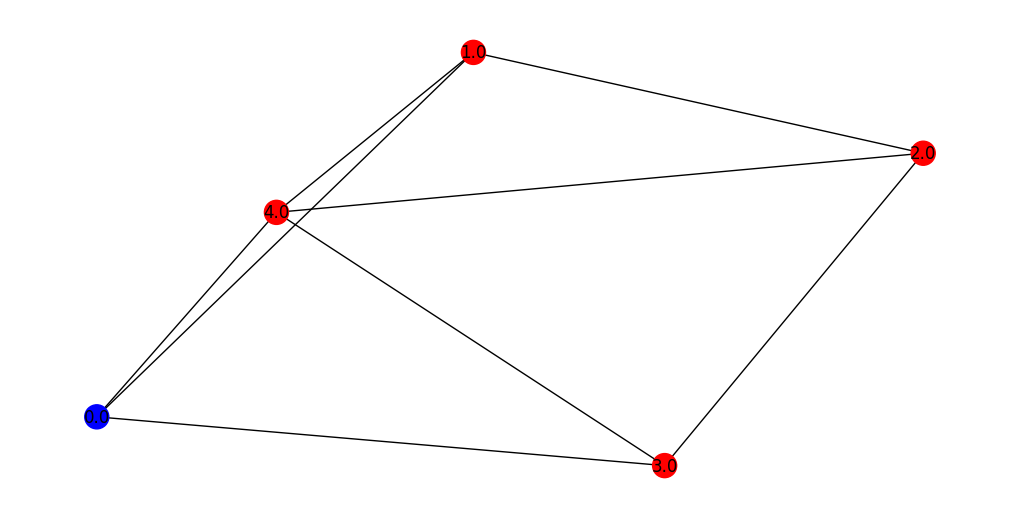

In [12]:
import networkx as nx 

script = """
signal { int nodeType; }
space {edges { int hop; }}
domain boolean;
formula MyFirstFormula = globally{( nodeType==3 ) reach(hop) [0, 1] ( nodeType==1 )};
"""

# a node type 3 should reach a node type 1 in one hop

moonlightScript = ScriptLoader.loadFromText(script)
monitor = moonlightScript.getMonitor("MyFirstFormula")

# [id_l0, id_l1, 1 (length)]
graph = [[[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], 
          [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]]
locationTimeArray = [0.0]
signal = [[[1.0]], [[3.0]], [[3.0]], [[3.0]], [[3.0]]]


plt.rcParams["figure.figsize"] = (10,5)
color = {1.0:"blue",3.0:"red"}
G = nx.Graph()
G.add_edges_from([(x[0],x[1]) for x in  graph[0]])
color_map = [color[value[0][0]] for value in signal]
nx.draw(G, node_color = color_map, with_labels = True)

In [13]:
result = monitor.monitor(locationTimeArray,graph,locationTimeArray,signal)
print(result)
# 1H 53min todo

# times: time interval
# graph: graph
# signalTimeArray: when the signal changes
# signalValues: evaluation of the property on each location
# [[0, 1], [0, 1], [0, -1]]
# first location: true, second: true, third: false

times = new double[]{0.0}
graph = new double[][][]{{{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 4.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 2.0, 1.0}, {4.0, 3.0, 1.0}}}
signalTimeArray = new double[]{0.0}
signalValues = new double[][][]{{{1.0}}, {{3.0}}, {{3.0}}, {{3.0}}, {{3.0}}}
[[[0.0, 1.0]], [[0.0, 1.0]], [[0.0, -1.0]], [[0.0, 1.0]], [[0.0, 1.0]]]


#### Make graph evolving

In [14]:
script = """
signal { int nodeType; }
space {edges { int hop; }}
domain boolean;
formula MyFirstFormula = globally{( nodeType==3 ) reach(hop) [0, 1] ( nodeType==1 )};
"""

moonlightScript = ScriptLoader.loadFromText(script)
monitor = moonlightScript.getMonitor("MyFirstFormula")

graph0 = [[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]
graph1 = [[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0],                  [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0],                  [4.0, 3.0, 1.0]]
graph = [graph0,graph1] # the graph changes: at some point the link beteween 4.0 - 0.0 and 4.0 - 2.0 is removed
locationTimeArray = [0.0, 1.0]
signal = [[[1.0],[1.0]], [[3.0],[3.0]], [[3.0],[3.0]], [[3.0],[3.0]], [[3.0],[3.0]]]

result = monitor.monitor(locationTimeArray,graph,locationTimeArray,signal)
print(result)



times = new double[]{0.0, 1.0}
graph = new double[][][]{{{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 4.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 2.0, 1.0}, {4.0, 3.0, 1.0}}, {{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 3.0, 1.0}}}
signalTimeArray = new double[]{0.0, 1.0}
signalValues = new double[][][]{{{1.0}, {1.0}}, {{3.0}, {3.0}}, {{3.0}, {3.0}}, {{3.0}, {3.0}}, {{3.0}, {3.0}}}
[[[0.0, 1.0], [1.0, 1.0]], [[0.0, 1.0], [1.0, 1.0]], [[0.0, -1.0], [1.0, -1.0]], [[0.0, 1.0], [1.0, 1.0]], [[0.0, 1.0], [1.0, 1.0]]]


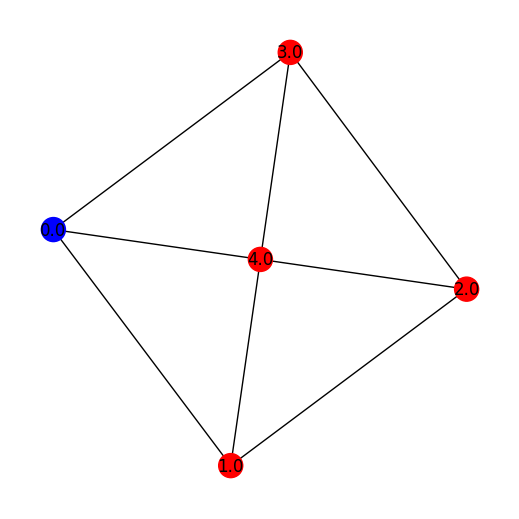

In [19]:
plt.rcParams["figure.figsize"] = (5,5)
color = {1.0:"blue",3.0:"red"}
G = nx.Graph()
G.add_edges_from([(x[0],x[1]) for x in  graph0])
color_map = [color[value[0][0]] for value in signal]
nx.draw(G, node_color = color_map, with_labels = True)

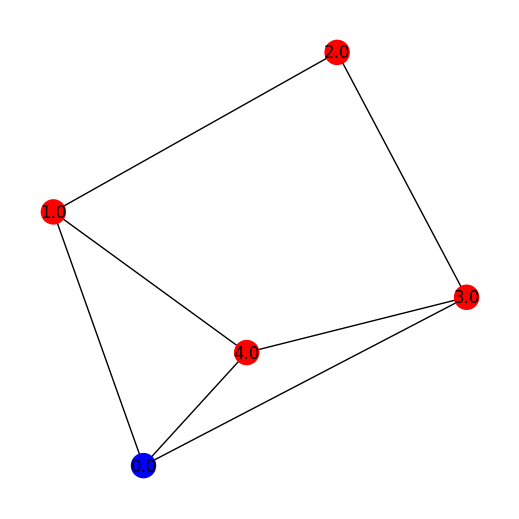

In [32]:
plt.rcParams["figure.figsize"] = (5,5)
color = {1.0:"blue",3.0:"red"}
G = nx.Graph()
G.add_edges_from([(x[0],x[1]) for x in  graph1])
color_map = [color[value[0][0]] for value in signal]
nx.draw(G, node_color = color_map, with_labels = True)

In [15]:
graph

[[[0.0, 1.0, 1.0],
  [0.0, 3.0, 1.0],
  [0.0, 4.0, 1.0],
  [1.0, 0.0, 1.0],
  [1.0, 4.0, 1.0],
  [1.0, 2.0, 1.0],
  [2.0, 1.0, 1.0],
  [2.0, 4.0, 1.0],
  [2.0, 3.0, 1.0],
  [3.0, 0.0, 1.0],
  [3.0, 2.0, 1.0],
  [3.0, 4.0, 1.0],
  [4.0, 0.0, 1.0],
  [4.0, 1.0, 1.0],
  [4.0, 2.0, 1.0],
  [4.0, 3.0, 1.0]],
 [[0.0, 1.0, 1.0],
  [0.0, 3.0, 1.0],
  [0.0, 4.0, 1.0],
  [1.0, 0.0, 1.0],
  [1.0, 4.0, 1.0],
  [1.0, 2.0, 1.0],
  [2.0, 1.0, 1.0],
  [2.0, 3.0, 1.0],
  [3.0, 0.0, 1.0],
  [3.0, 2.0, 1.0],
  [3.0, 4.0, 1.0],
  [4.0, 0.0, 1.0],
  [4.0, 1.0, 1.0],
  [4.0, 3.0, 1.0]]]

#### loadFormFile

In [16]:
scriptPath = "script.mls"
moonlightScript = ScriptLoader.loadFromFile(scriptPath)
monitor = moonlightScript.getMonitor("MyFirstFormula")

graph = [[[0.0, 1.0, 1.0], [0.0, 3.0, 1.0], [0.0, 4.0, 1.0], [1.0, 0.0, 1.0], [1.0, 4.0, 1.0], [1.0, 2.0, 1.0], [2.0, 1.0, 1.0], [2.0, 4.0, 1.0], [2.0, 3.0, 1.0], [3.0, 0.0, 1.0], [3.0, 2.0, 1.0], [3.0, 4.0, 1.0], [4.0, 0.0, 1.0], [4.0, 1.0, 1.0], [4.0, 2.0, 1.0], [4.0, 3.0, 1.0]]]
locationTimeArray = [0.0]
signal = [[[1.0]], [[3.0]], [[3.0]], [[3.0]], [[3.0]]]

result = monitor.monitor(locationTimeArray,graph,locationTimeArray,signal)
print(result)

times = new double[]{0.0}
graph = new double[][][]{{{0.0, 1.0, 1.0}, {0.0, 3.0, 1.0}, {0.0, 4.0, 1.0}, {1.0, 0.0, 1.0}, {1.0, 4.0, 1.0}, {1.0, 2.0, 1.0}, {2.0, 1.0, 1.0}, {2.0, 4.0, 1.0}, {2.0, 3.0, 1.0}, {3.0, 0.0, 1.0}, {3.0, 2.0, 1.0}, {3.0, 4.0, 1.0}, {4.0, 0.0, 1.0}, {4.0, 1.0, 1.0}, {4.0, 2.0, 1.0}, {4.0, 3.0, 1.0}}}
signalTimeArray = new double[]{0.0}
signalValues = new double[][][]{{{1.0}}, {{3.0}}, {{3.0}}, {{3.0}}, {{3.0}}}
[[[0.0, 1.0]], [[0.0, 1.0]], [[0.0, -1.0]], [[0.0, 1.0]], [[0.0, 1.0]]]
